In [1]:
import numpy as np
import pandas as pd

In [2]:
df1 = pd.read_csv("./records.csv")
df2 = pd.read_csv("./records-2.csv")
df3 = pd.read_csv("./records-3.csv")

In [3]:
merged_1 = pd.merge(df1, df2, how='outer')

In [4]:
df = pd.merge(merged_1, df3, how = "outer")

In [5]:
df.shape

(5817, 5)

In [6]:
print("\nSplitting 'location' column into two different columns :\n", 
                                  df["Company Location"].str.split(",",expand=True))


Splitting 'location' column into two different columns :
                               0          1
0            Remote in Columbus   OH 43215
1     Hybrid remote in Columbus   OH 43211
2                           NaN        NaN
3                           NaN        NaN
4                           NaN        NaN
...                         ...        ...
5812                        NaN        NaN
5813            Prescott Valley         AZ
5814                     Tucson         AZ
5815                     Tucson         AZ
5816                        NaN        NaN

[5817 rows x 2 columns]


In [7]:
df[['city','state']]=df["Company Location"].str.split(",",expand=True)

In [8]:
df

,Job title,Salary,Date,Company Location,Company Name,city,state
0,HYBRID - Electronic and Digital Design Special...,$27.03 an hour,19 days ago,"Remote in Columbus, OH 43215",State of Ohio Jobs,Remote in Columbus,OH 43215
1,Layout Design Artist,$20.76 an hour,1 day ago,"Hybrid remote in Columbus, OH 43211",State of Ohio Jobs,Hybrid remote in Columbus,OH 43211
2,Design Researcher,NaN,8 days ago,NaN,Central Mutual Insurance Company,NaN,NaN
3,Public Information Officer,$24.53 an hour,30 days ago,NaN,Franklin County Child Support Enforcement Agency,NaN,NaN
4,Public Information Officer,$24.53 an hour,30 days ago,NaN,Franklin County Child Support Enforcement Agency,NaN,NaN
...,...,...,...,...,...,...,...
5812,"Extension Educator, 4-H Youth Development",NaN,1 day ago,NaN,Oklahoma State University,NaN,NaN
5813,Facilities Management & Services Worker II (Pr...,$20 an hour,30+ days ago,"Prescott Valley, AZ",University of Arizona,Prescott Valley,AZ
5814,"Director, Cooperative Extension",NaN,30+ days ago,"Tucson, AZ",University of Arizona,Tucson,AZ
5815,"Associate Director, Programs, Family and Consu...",NaN,30+ days ago,"Tucson, AZ",University of Arizona,Tucson,AZ


In [9]:
state_groups =df.groupby("state")
state_groups["city"].count()

state
 AL          356
 AL 35005      2
 AL 35020      5
 AL 35022     19
 AL 35023      1
            ... 
 UT            2
 VA            1
 WA            5
 WA 98225      4
 WI            1
Name: city, Length: 200, dtype: int64

In [10]:
import matplotlib.pyplot as plt
#plt.bar(state_groups.index, job_cnt, color='r', alpha=0.5, align="center")
job_count=state_groups.count()
job_cnt=job_count['city']

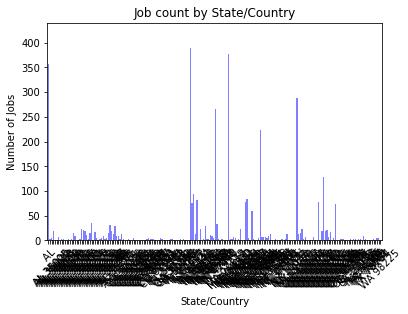

In [11]:
plt.bar(job_count.index, job_count['city'], color='b', alpha=0.5, align="center")

plt.xlim(-0.75, len(job_count.index))
plt.ylim(0, max(job_count['city'])+50)
plt.title("Job count by State/Country")
plt.xlabel("State/Country")
plt.ylabel("Number of Jobs")

plt.xticks(rotation=45)
plt.show()

In [12]:
df = df.drop_duplicates(keep=False)

In [13]:
df.head(10)

,Job title,Salary,Date,Company Location,Company Name,city,state
0,HYBRID - Electronic and Digital Design Special...,$27.03 an hour,19 days ago,"Remote in Columbus, OH 43215",State of Ohio Jobs,Remote in Columbus,OH 43215
1,Layout Design Artist,$20.76 an hour,1 day ago,"Hybrid remote in Columbus, OH 43211",State of Ohio Jobs,Hybrid remote in Columbus,OH 43211
2,Design Researcher,NaN,8 days ago,NaN,Central Mutual Insurance Company,NaN,NaN
12,Design Consultant,"Up to $180,000 a year",30+ days ago,"Dublin, OH 43016",Bassett Furniture,Dublin,OH 43016
13,"Product Design, Associate",NaN,4 days ago,NaN,"JPMorgan Chase Bank, N.A.",NaN,NaN
14,"Artist, Graphic Retail",NaN,1 day ago,NaN,"Giant Eagle, Inc.",NaN,NaN
15,Product Design Engineer,NaN,30+ days ago,"Remote in London, OH",Harness.io,Remote in London,OH
16,Designer,NaN,30+ days ago,NaN,McGraw Hill,NaN,NaN
17,Pricing Design Architect III - REMOTE/HYBRID,NaN,15 days ago,"Remote in Columbus, OH",FedEx Supply Chain,Remote in Columbus,OH
18,Design Consultant,NaN,30+ days ago,NaN,The Cleary Company,NaN,NaN


In [14]:
df.shape

(2398, 7)

In [15]:
df.isna().sum()

Job title              0
Salary              1774
Date                  10
Company Location     857
Company Name           0
city                 857
state               1010
dtype: int64

In [16]:
print(df[pd.isnull(df['city'])].shape)
df1 = df[pd.isnull(df['city'])]
#print(df1[df1['city'] != np.nan]['Company Name'].unique())
len(df1)

(857, 7)


857

In [17]:
df.to_csv("clean_data.csv")